In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

In [23]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, batch_size=32, learning_rate=0.0001):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)
        
        self.loss = []
        self.theta = []
        self.avg_minibatch_partial_grads = []
        
        for _ in range(1, epochs):
            loss = self._avg_minibatch_loss(x, self.theta_array, y)
            print('loss: ', loss)
            print("theta: {}".format(self.theta_array))
            self.loss.append(loss)
            self.theta.append(self.theta_array)
            avg_minibatch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            print('x.transpose().dot(self.theta_array) - y): {}'
                  .format(x.transpose().dot(self.theta_array) - y))
            print('x: {}'.format(x))
            print('y: {}'.format(y))
            print('avg minibatch_partial_grads: {}'.format(avg_minibatch_partial_grads))
            self.avg_minibatch_partial_grads.append(avg_minibatch_partial_grads)
            self.theta_array -= learning_rate * avg_minibatch_partial_grads

    def validate(self, x, y):
        self._check_theta_exists('validating')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists('predicting')

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_minibatch_loss(self, x, theta_array, y):
        # RMSE
        avg_minibatch_loss = np.sqrt(
                 np.average(
                 np.square(
                 x.transpose().dot(theta_array) - y)))
        return avg_minibatch_loss
    
    def _check_theta_exists(self, phrase):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before {}}.".format(phrase))


In [24]:
linear_regression = LinearRegression()

In [25]:
x = np.array(np.arange(10))
delta = np.random.uniform(-10,10, size=(10,))
y = (.4 * x +3 + delta)

In [29]:
linear_regression.train(x, y, epochs=10, learning_rate=1)

loss:  4.974626265591603
theta: [0. 0.]
x.transpose().dot(self.theta_array) - y): [ -1.17975653   1.55541283  -1.88179914  -3.40504605  -3.28705203
  -2.20914006 -12.17243721  -7.9471105    0.32459295  -1.18627964]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 1.17975653 -1.55541283  1.88179914  3.40504605  3.28705203  2.20914006
 12.17243721  7.9471105  -0.32459295  1.18627964]
avg minibatch_partial_grads: [-17.33614019  -3.13886154]
loss:  92.02713025490509
theta: [17.33614019  3.13886154]
x.transpose().dot(self.theta_array) - y): [  1.95910501  22.03041456  35.92934278  51.74223606  69.19637028
  87.61042244  94.98326549 116.54473239 142.15257604 157.97784363]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 1.17975653 -1.55541283  1.88179914  3.40504605  3.28705203  2.20914006
 12.17243721  7.9471105  -0.32459295  1.18627964]
avg minibatch_partial_grads: [490.86873224  78.01263087]
loss:  2594.659832932359
theta: [-473.53259204

In [27]:
linear_regression.train(x, y, epochs=15, learning_rate=0.001)

loss:  4.974626265591603
theta: [0. 0.]
x.transpose().dot(self.theta_array) - y): [ -1.17975653   1.55541283  -1.88179914  -3.40504605  -3.28705203
  -2.20914006 -12.17243721  -7.9471105    0.32459295  -1.18627964]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 1.17975653 -1.55541283  1.88179914  3.40504605  3.28705203  2.20914006
 12.17243721  7.9471105  -0.32459295  1.18627964]
avg minibatch_partial_grads: [-17.33614019  -3.13886154]
loss:  4.912757178959533
theta: [0.01733614 0.00313886]
x.transpose().dot(self.theta_array) - y): [ -1.17661767   1.57588783  -1.843988    -3.34989877  -3.21456861
  -2.1193205  -12.0652815   -7.82261866   0.46642093  -1.02711552]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 1.17975653 -1.55541283  1.88179914  3.40504605  3.28705203  2.20914006
 12.17243721  7.9471105  -0.32459295  1.18627964]
avg minibatch_partial_grads: [-16.82793532  -3.05771005]
loss:  4.8537272441770245
theta: [0.03416408 0.0

In [28]:
linear_regression.train(x, y, epochs=20, learning_rate=0.01)

loss:  4.974626265591603
theta: [0. 0.]
x.transpose().dot(self.theta_array) - y): [ -1.17975653   1.55541283  -1.88179914  -3.40504605  -3.28705203
  -2.20914006 -12.17243721  -7.9471105    0.32459295  -1.18627964]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 1.17975653 -1.55541283  1.88179914  3.40504605  3.28705203  2.20914006
 12.17243721  7.9471105  -0.32459295  1.18627964]
avg minibatch_partial_grads: [-17.33614019  -3.13886154]
loss:  4.40970812328682
theta: [0.1733614  0.03138862]
x.transpose().dot(self.theta_array) - y): [ -1.14836792   1.76016285  -1.50368772  -2.85357323  -2.56221781
  -1.31094444 -11.10088018  -6.70219207   1.74287278   0.40536159]
x: [[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
y: [ 1.17975653 -1.55541283  1.88179914  3.40504605  3.28705203  2.20914006
 12.17243721  7.9471105  -0.32459295  1.18627964]
avg minibatch_partial_grads: [-12.25409147  -2.32734661]
loss:  4.097329961447762
theta: [0.29590232 0.054

[array([-31.31557202,  -4.72605158]), array([60.06053145,  9.83856099]), array([-115.53933562,  -18.17253426]), array([221.92541132,  35.63742019]), array([-426.59885004,  -67.79275692]), array([819.71461318, 130.95600129]), array([-1575.40223497,  -251.01117477]), array([3027.44916334,  483.02094844]), array([-5818.14037899,  -927.63326991])]


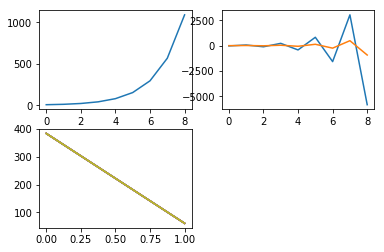

In [20]:
print((linear_regression.avg_minibatch_partial_grads))

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(linear_regression.loss)

plt.subplot(2, 2, 2)
plt.plot(np.array(linear_regression.avg_minibatch_partial_grads))

plt.subplot(2, 2, 3)
plt.plot(np.array(linear_regression.theta).transpose())

plt.show()


In [21]:
y_predicted = linear_regression.predict(x)

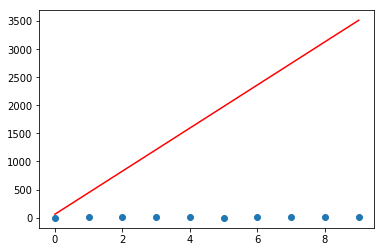

In [22]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()